In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [21]:
df=pd.read_csv("titanic.csv")

In [22]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [61]:
def generate_feedback(row):
    if row["Survived"]==1:
        return "Great experience,I survived !" if row["Pclass"]==1 else "Lucky to Alive."
    else:
        return "Terrible,did not make it!" if row["Pclass"]==3 else "Sad experience"
df['Feedback']=df.apply(generate_feedback,axis=1)
df['Sentiment']=df["Survived"].map({1:"positive",0:"Negative"})

label_encoder=LabelEncoder()

df["Sentiment_encoded"]=label_encoder.fit_transform(df["Sentiment"])

vectorizer=TfidfVectorizer()

X=vectorizer.fit_transform(df["Feedback"])
print(df["Feedback"])
y=df["Sentiment_encoded"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
KNeighborsClassifier(n_neighbors=3)
y_pred=knn.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:\n",accuracy)
print("Classfication_report:\n",classification_report(y_test,y_pred))
print("confusion Matrix:\n",confusion_matrix(y_test,y_pred))
                           

0          Terrible,did not make it!
1                    Lucky to Alive.
2                     Sad experience
3          Terrible,did not make it!
4                    Lucky to Alive.
                   ...              
413        Terrible,did not make it!
414    Great experience,I survived !
415        Terrible,did not make it!
416        Terrible,did not make it!
417        Terrible,did not make it!
Name: Feedback, Length: 418, dtype: object
Accuracy:
 1.0
Classfication_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

confusion Matrix:
 [[50  0]
 [ 0 34]]


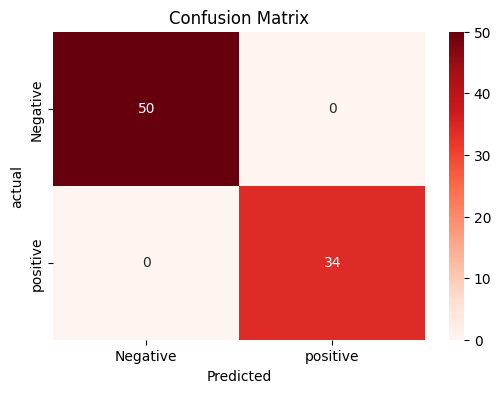

In [50]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d",cmap="Reds",xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("actual")
plt.title("Confusion Matrix")
plt.show()
